# Figure S3

In [1]:
%load_ext autoreload
%autoreload 2

%run ../../setup_project.py
%run ../../generic_plot_functions.py
%run x_correlation_functions.py

import os.path
import shutil
from scipy.stats import wilcoxon, pearsonr

In [2]:
projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_mec",dataPath=PROJECT_DATA_PATH,dlcModelPath="")

creating myProject, an autopipy.project object
Project name: autopi_mec
dataPath: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt/
dlcModelPath: 
Reading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


# Make figures for at lever interval

In [3]:
def plot_map_and_cross_one_session_lever(fig,gcCrossCor):
    """
    Plot the cc for the different task conditions and rf
    """
    mainSpec = fig.add_gridspec(ncols=5, nrows=4,height_ratios=[0.07,1]*2,width_ratios=[1,0.1,1,0.1,1]) # to be passed to function
    titleSpec = gridspec.GridSpecFromSubplotSpec(ncols=5, nrows=4,height_ratios=[0.01,1,0.1,1],width_ratios=[1,0.1,1,0.1,1], subplot_spec=mainSpec[:,:])

    mapSpec1 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=mainSpec[1:2,0:1])
    plot_map_and_cross_corr(mapSpec1,sessionName, myMaps,cells, gc_pairs, gcCrossCor, env="circ80_1",nCells=nCells)

    mapSpec2 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=mainSpec[1:2,2:3])
    plot_map_and_cross_corr(mapSpec2,sessionName, myMaps,cells, gc_pairs, gcCrossCor, env='searchToLeverPath_light',nCells=nCells)

    mapSpec2 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=mainSpec[1:2,4:5])
    plot_map_and_cross_corr(mapSpec2,sessionName, myMaps,cells, gc_pairs, gcCrossCor, env='searchToLeverPath_dark',nCells=nCells)

    mapSpec1 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=mainSpec[3:4,0:1])
    plot_map_and_cross_corr(mapSpec1,sessionName, myMaps,cells, gc_pairs, gcCrossCor, env="circ80_2",nCells=nCells)

    mapSpec2 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=mainSpec[3:4,2:3])
    plot_map_and_cross_corr(mapSpec2,sessionName, myMaps,cells, gc_pairs, gcCrossCor, env='homingFromLeavingLever_light',nCells=nCells)

    mapSpec2 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=mainSpec[3:4,4:5])
    plot_map_and_cross_corr(mapSpec2,sessionName, myMaps,cells, gc_pairs, gcCrossCor, env='homingFromLeavingLever_dark',nCells=nCells)


    for i,c in enumerate(["Random foraging 1", "AutoPI Search-Light","AutoPI Search-Dark"]):
        ax = fig.add_subplot(titleSpec[0,i*2]) # add an axes to the figure
        ax.text(0.5, 0.5, c,fontsize=9,horizontalalignment='center',verticalalignment='center',)
        ax.axis('off')
    for i,c in enumerate(["Random foraging 2", "AutoPI Homing-Light","AutoPI Homing-Dark"]):
        ax = fig.add_subplot(titleSpec[2,i*2]) # add an axes to the figure
        ax.text(0.5, 0.5, c,fontsize=9,horizontalalignment='center',verticalalignment='center',)
        ax.axis('off')  
         

In [4]:
fn=myProject.dataPath+"/results/gc_pairs.csv"
print("Loading:",fn)
gc_pairs = pd.read_csv(fn)

Loading: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/gc_pairs.csv


In [5]:
fn=myProject.dataPath+"/results/gc_crosscorrs.pickle"
print("Loading",fn)
with open(fn, 'rb') as fp: 
    gcCrossCor = pickle.load(fp)

Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/gc_crosscorrs.pickle


In [6]:
fn=myProject.dataPath+"/results/atlever_gc_stcfm_10_0.5.pickle"
print("Loading",fn)
with open(fn, 'rb') as fp: 
    gcStcfmLever = pickle.load(fp)

Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/atlever_gc_stcfm_10_0.5.pickle


In [7]:
fn=myProject.dataPath+"/results/mySpatialAutosLever.pickle"
print("Loading",fn)
with open(fn, 'rb') as fp: 
    mySpatialAutosLever = pickle.load(fp)

Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/mySpatialAutosLever.pickle


In [8]:
# See if crosscorrelation works with lever-centered maps
fn = myProject.dataPath+"/results/myLeverMapsArena.pickle"
with open(fn, 'rb') as handle:
   myLeverMaps = pickle.load(handle)

In [9]:
fn=myProject.dataPath+"/results/gc_stcfm_10_0.5.pickle"
print("Loading",fn)
with open(fn, 'rb') as fp: 
    gcStcfm = pickle.load(fp)

Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/gc_stcfm_10_0.5.pickle


In [10]:
fn=myProject.dataPath+"/results/gc_stcfm_rotations.pickle"
print("Loading:",fn)
with open(fn, 'rb') as fp: 
    gcStcfmRot = pickle.load(fp)

Loading: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/gc_stcfm_rotations.pickle


In [11]:
fn=myProject.dataPath+"/results/gc_pairs_stcfm.pickle"
print("Loading:",fn)
with open(fn, 'rb') as fp: 
    gcStcfm_pairs = pickle.load(fp)

Loading: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/gc_pairs_stcfm.pickle


In [12]:
fn=myProject.dataPath+"/results/myMaps.pickle"
print("Loading",fn)
with open(fn, 'rb') as fp: 
    myMaps = pickle.load(fp)

Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/myMaps.pickle


In [13]:
fn = myProject.dataPath+"/results/cells.csv"
print("Loading", fn)
cells = pd.read_csv(fn)

Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/cells.csv


In [14]:
fn=myProject.dataPath+"/results/mySpatialAutos.pickle"
print("Loading",fn)
with open(fn, 'rb') as fp: 
    mySpatialAutos = pickle.load(fp)

Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/mySpatialAutos.pickle


In [15]:
def plot_map_and_cross_corr_lever(mainSpec, sessionName, myMaps,cells, gc_pairs, gcCrossCor,  env="circ80_1",leverMapEnv='all_light',nCells=10):
    """
    Plot firing rate maps and spatial crosscorrelations
    """
    
    cluIds = cells[(cells.gridCell_AND==True) & (cells.session==sessionName)].cluId.head(nCells)
    indices = cluIds.index
    
    ncols=len(cluIds)+1
    nrows=len(cluIds)+1
    mapSpec = gridspec.GridSpecFromSubplotSpec(ncols=ncols, nrows=nrows, subplot_spec=mainSpec[0])
    
   
    # vertical maps on the left-most column
    for i, (cluId, ind) in enumerate(zip(cluIds,indices)):
        ax = fig.add_subplot(mapSpec[i+1,0]) # add an axes to the figure
        m = myMaps['map'][leverMapEnv]['arenaref']['data'][ind,:,:]
        plotMap(ax,m,titleY=0.95,titleFontSize=8,title = "")
        title = i # "{:.2f} Hz".format(np.nanmax(m))
        ax.text(m.shape[0]/2, m.shape[1]+3, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)
        x = np.cos(np.linspace(0,2*np.pi,100))*40/3 + m.shape[0]/2
        y = np.sin(np.linspace(0,2*np.pi,100))*40/3 + m.shape[1]/2
        ax.plot(x,y, "--",color="grey", alpha=0.5)

    # horizontal maps at the top
    for i, (cluId, ind) in enumerate(zip(cluIds,indices)):
        ax = fig.add_subplot(mapSpec[0,i+1]) # add an axes to the figure
        m = myMaps['map'][leverMapEnv]['arenaref']['data'][ind,:,:]
        plotMap(ax,m,titleY=0.95,titleFontSize=8,title = "")
        title = i # "{:.2f} Hz".format(np.nanmax(m))
        ax.text(m.shape[0]/2, m.shape[1]+3, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)
        x = np.cos(np.linspace(0,2*np.pi,100))*40/3 + m.shape[0]/2
        y = np.sin(np.linspace(0,2*np.pi,100))*40/3 + m.shape[1]/2
        ax.plot(x,y, "--",color="grey", alpha=0.5)
    
    # spatial autocorrelations
    for i, (cluId, ind) in enumerate(zip(cluIds,indices)):
        ax = fig.add_subplot(mapSpec[i+1,i+1]) # add an axes to the figure
        m = mySpatialAutosLever[env][ind,:,:]+1
        mSmall = spatialCrosscorrelationRemovePadding(m)
        plotSpatialCrosscorrelation(ax,m,removePadding=True,showCenter=False)
        title = "{0}-{1}".format(i,i)
        ax.text(mSmall.shape[0]/2+1, mSmall.shape[1]+6, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)
    
    # spatial cross-correlation
    for i, (cluId1, ind) in enumerate(zip(cluIds,indices)):
        for j, (cluId2, ind) in enumerate(zip(cluIds,indices)):
            if (j>i):
                ax = fig.add_subplot(mapSpec[i+1,j+1]) # add an axes to the figure
                ccIndex = gc_pairs[(gc_pairs.cluId1==cluId1) & 
                                   (gc_pairs.cluId2==cluId2)].index[0]
                m = gcCrossCor[env][ccIndex]
                
                if np.sum(~np.isnan(m))!=0:
                    mSmall = spatialCrosscorrelationRemovePadding(m)
                    plotSpatialCrosscorrelation(ax,mSmall,removePadding=False)
                    title = "{0}-{1}".format(i,j)
                    ax.text(mSmall.shape[0]/2+1, mSmall.shape[1]+3, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)

def plot_map_and_cross_for_figure_lever(mainSpec,sessionName,gcCrossCor,gcCrossCorLever,gcStcfmRot,gcStcfm_pairs,nCells):
    """
    Plot the cc for the different task conditions and rf
    """
    
    plotSpec = gridspec.GridSpecFromSubplotSpec(ncols=3, nrows=4,height_ratios=[0.07,1,0.07,1],width_ratios=[1,0.1,1], subplot_spec=mainSpec[:,:])
    
    titleSpec = gridspec.GridSpecFromSubplotSpec(ncols=3, nrows=4,height_ratios=[0.01,1,0.01,1],width_ratios=[1,0.1,1], subplot_spec=mainSpec[:,:])

    
    mapSpec1 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=plotSpec[1:2,0:1])
    plot_map_and_cross_corr(mapSpec1,sessionName, myMaps,cells, gc_pairs, gcCrossCor, env="circ80_2",nCells=nCells)

    mapSpec2 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=plotSpec[1:2,2:3])
    plot_map_and_cross_corr_lever(mapSpec2,sessionName, myLeverMaps,cells, gc_pairs, gcCrossCorLever, env='atLever_light',leverMapEnv='all_light',nCells=nCells)

    mapSpec3 = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1, subplot_spec=plotSpec[3:4,0:1])
    plot_map_and_cross_corr_lever(mapSpec3,sessionName, myLeverMaps,cells, gc_pairs, gcCrossCorLever, env='atLever_dark',leverMapEnv='all_dark',nCells=nCells)
    
    

    for i,c in enumerate(["Random foraging 2 (RF2)", "AutoPI at Lever-Light (LL)","AutoPI at Lever-Dark (LD)"]):
        if i < 2:
            ax = fig.add_subplot(titleSpec[0,i*2]) # add an axes to the figure
            ax.text(0.5, 0.5, c,fontsize=9,horizontalalignment='center',verticalalignment='center',)
            ax.axis('off')
        else:
            ax = fig.add_subplot(titleSpec[2,0]) # add an axes to the figure
            ax.text(0.5, 0.5, c,fontsize=9,horizontalalignment='center',verticalalignment='center',)
            ax.axis('off')
            
def plotMap(ax,myMap,title="",titleY=0.95,titleFontSize=10,transpose=True,cmap="jet",vmin=0):
    """
    Plot one 2D map
    """
    if transpose:
        ax.imshow(myMap.T,origin="lower",cmap=cmap,interpolation=None, vmin=vmin)
    else:
        ax.imshow(myMap,origin="lower",cmap=cmap,interpolation=None, vmin=vmin)
    ax.set_title(title,y=titleY,fontsize=titleFontSize)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    
    
def plotSpatialCrosscorrelation(ax,cc, removePadding=False,showCenter=True,showPeak=False,useFieldDetection=True,showExpectedPeak=False,xOffset=None,yOffset=None,cm_per_bin=None,title="",
                               field_detection_neighborhood_size=3.5, field_detection_max_min_threshold=0.1, field_detection_min_peak_value=0.2):
    """
    Function to plot spatial crosscorrelation or spike-triggered short-time cross-firing rate map
    
    Arguments:
    ax: axes
    cc: 2D numpy array with the spatial crosscorrelation or ststcfrm
    removePadding: whether to remove padding when plotting. Padding are columns or rows with only invalid data. See spatialCrosscorrelationRemovePadding()
    showCenter: boolean, will plot lines and a dot to show the center of the map
    showPeak: boolean, will plot lines and a dot to show the peak of the map (where the maximal value is)
    useFieldDetection: boolean, if showPeak is True and useFiedlDetection is True, will use field detection to find the closest peak to the center
    showExpectedPeak: boolean, use when debugging, can plot lines and dot to show the expected peak in the map
    xOffset, yOffset: use with showExpectedPeak, this is the xOffset and yOffset 
    
    
    """
    
    cx = cc.copy()
    if removePadding:
        cx=spatialCrosscorrelationRemovePadding(cx,extraPadding=0)
    
    if np.nanmin(cx) < 0: # assumes that the values are from -1 to 1 (Pearson correlation coefficients and not rate), add +1 to values so that negative values are not clamped at 0
        plotMap(ax,cx+1,title="",titleY=0.95,titleFontSize=8,vmin=np.nanmin(cx+1)) # this plots the transpose of the map
    else :
        plotMap(ax,cx,title="",titleY=0.95,titleFontSize=8, vmin=np.nanmin(cx)) # this plots the transpose of the map
    
    if showCenter:
        # crosscorrelation and autocorrelations always have an odd number of bins
        # for example if 7x7, then mid point should be at index 3,3
        midPoint=(cx.shape[0]/2-0.5,cx.shape[1]/2-0.5)
        #print("Center:",midPoint)
        ax.plot([0,cx.shape[0]], [midPoint[1],midPoint[1]],"--",color="black", alpha=0.5) # horizontal line for the center of the cc
        ax.plot([midPoint[0],midPoint[0]],[0,cx.shape[1]],"--",color="black", alpha=0.5) # vertical line for the center of the cc
        ax.scatter([midPoint[0]],[midPoint[1]],color="black",alpha=0.5,s=1)
    
    if showExpectedPeak: # use for testing the functions
        ax.plot([0,cx.shape[1]], [midPoint[1]+yOffset/cm_per_bin,midPoint[1]+yOffset/cm_per_bin],"--",color="gray", alpha=0.8) # expected offset for testing, horizontal line
        ax.plot([midPoint[0]+xOffset/cm_per_bin, midPoint[0]+xOffset/cm_per_bin],[0,cx.shape[0]],"--",color="gray", alpha=0.8) # expected offset for testing, vertical line
        ax.scatter([midPoint[0]+xOffset/cm_per_bin], [midPoint[1]+yOffset/cm_per_bin],color="red", alpha=0.8) # expected offset for testing, vertical line
    
    if showPeak:
        cxm = cx.copy()
        if useFieldDetection==False:
            
            cxm[np.isnan(cxm)]=np.nanmin(cxm) # set invalid values to the minimal value in the array, won't be detected as peak.
            peakLoc = np.unravel_index(np.argmax(cxm, axis=None), cxm.shape)
            print("Location of the peak value:", peakLoc)
        if useFieldDetection==True:
            _,_,_,_,_,_,_,peakLoc,_,_,_ = crosscorrelation_map_stats(cxm,cm_per_bin=2, field_detection_neighborhood_size=field_detection_neighborhood_size, field_detection_max_min_threshold=field_detection_max_min_threshold, field_detection_min_peak_value=field_detection_min_peak_value)
            print("Location of the detected field peak:", peakLoc)
        
        ax.scatter([peakLoc[0]], [peakLoc[1]],color="pink", alpha=0.8) # real peak in the crosscorrelation
        ax.plot([0,cx.shape[1]], [peakLoc[1],peakLoc[1]],"--",color="pink", alpha=0.8) # expected offset for testing, horizontal line
        ax.plot([peakLoc[0], peakLoc[0]],[0,cx.shape[0]],"--",color="pink", alpha=0.8) # expected offset for testing, vertical line
    ax.set_title(title)  
def plot_map_and_cross_corr(mainSpec, sessionName, myMaps,cells, gc_pairs, gcCrossCor,  env="circ80_1",nCells=10):
    """
    Plot firing rate maps and spatial crosscorrelations
    """
    
    cluIds = cells[(cells.gridCell_AND==True) & (cells.session==sessionName)].cluId.head(nCells)
    indices = cluIds.index
    
    ncols=len(cluIds)+1
    nrows=len(cluIds)+1
    mapSpec = gridspec.GridSpecFromSubplotSpec(ncols=ncols, nrows=nrows, subplot_spec=mainSpec[0])
    
   
    # vertical maps on the left-most column
    for i, (cluId, ind) in enumerate(zip(cluIds,indices)):
        ax = fig.add_subplot(mapSpec[i+1,0]) # add an axes to the figure
        m = myMaps[env][ind,:,:]
        plotMap(ax,m,titleY=0.95,titleFontSize=8,title = "")
        title = i # "{:.2f} Hz".format(np.nanmax(m))
        ax.text(m.shape[0]/2, m.shape[1]+3, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)
        x = np.cos(np.linspace(0,2*np.pi,100))*40/3 + m.shape[0]/2
        y = np.sin(np.linspace(0,2*np.pi,100))*40/3 + m.shape[1]/2
        ax.plot(x,y, "--",color="grey", alpha=0.5)

    # horizontal maps at the top
    for i, (cluId, ind) in enumerate(zip(cluIds,indices)):
        ax = fig.add_subplot(mapSpec[0,i+1]) # add an axes to the figure
        m = myMaps[env][ind,:,:]
        plotMap(ax,m,titleY=0.95,titleFontSize=8,title = "")
        title = i # "{:.2f} Hz".format(np.nanmax(m))
        ax.text(m.shape[0]/2, m.shape[1]+3, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)
        x = np.cos(np.linspace(0,2*np.pi,100))*40/3 + m.shape[0]/2
        y = np.sin(np.linspace(0,2*np.pi,100))*40/3 + m.shape[1]/2
        ax.plot(x,y, "--",color="grey", alpha=0.5)
    
    # spatial autocorrelations
    for i, (cluId, ind) in enumerate(zip(cluIds,indices)):
        ax = fig.add_subplot(mapSpec[i+1,i+1]) # add an axes to the figure
        m = mySpatialAutos[env][ind,:,:]+1
        mSmall = spatialCrosscorrelationRemovePadding(m)
        plotSpatialCrosscorrelation(ax,m,removePadding=True,showCenter=False)
        title = "{0}-{1}".format(i,i)
        ax.text(mSmall.shape[0]/2+1, mSmall.shape[1]+6, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)
    
    # spatial cross-correlation
    for i, (cluId1, ind) in enumerate(zip(cluIds,indices)):
        for j, (cluId2, ind) in enumerate(zip(cluIds,indices)):
            if (j>i):
                ax = fig.add_subplot(mapSpec[i+1,j+1]) # add an axes to the figure
                ccIndex = gc_pairs[(gc_pairs.cluId1==cluId1) & 
                                   (gc_pairs.cluId2==cluId2)].index[0]
                m = gcCrossCor[env][ccIndex]
                
                if np.sum(~np.isnan(m))!=0:
                    mSmall = spatialCrosscorrelationRemovePadding(m)
                    plotSpatialCrosscorrelation(ax,mSmall,removePadding=False)
                    title = "{0}-{1}".format(i,j)
                    ax.text(mSmall.shape[0]/2+1, mSmall.shape[1]+3, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)

In [16]:
import scipy


def report_stats(inputDf):
    for cond in inputDf.condition.unique():
        sliceDf = inputDf[inputDf.condition == cond].copy().reset_index()
        r_values = sliceDf.r.values
        
        stats, p = scipy.stats.wilcoxon(r_values)
        
        print('*****')
        print(f'Condition: {cond}, Stats: {stats}, P_value: {p}')

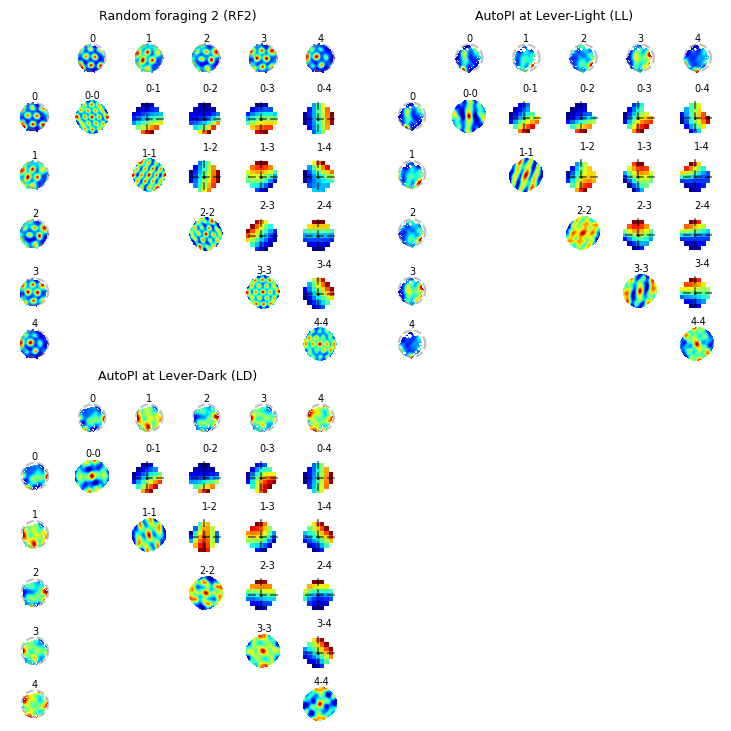

In [17]:
rowSize,colSize= 0.6,0.6 
nCells=5
ncols=(nCells+1)*2
nrows=(nCells+1)*2
sessionName = "jp1686-26042022-0108" 


fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) # create a figure.
mainSpec = fig.add_gridspec(ncols=1, nrows=1) # create a GridSpec object to a figure

plot_map_and_cross_for_figure_lever(mainSpec,sessionName,gcStcfm,gcStcfmLever,gcStcfmRot,gcStcfm_pairs,nCells)

In [ ]:
fn=myProject.dataPath+"/results/atlever_gc_pairs_stcfm.pickle"
print("Loading:",fn)
with open(fn, 'rb') as fp: 
    gcStcfm_pairs_lever = pickle.load(fp)

Loading: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/atlever_gc_pairs_stcfm.pickle


: 

In [ ]:
fn=myProject.dataPath+"/results/atlever_gc_stcfm_rotations.pickle"
print("Loading:",fn)
with open(fn, 'rb') as fp: 
    gcStcfmRot_lever = pickle.load(fp)

Loading: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/atlever_gc_stcfm_rotations.pickle


In [ ]:
fn=myProject.dataPath+"/results/atlever_gc_stcfm_rotations_stats.pickle"
print("Loading:",fn)
with open(fn, 'rb') as fp: 
    gcStcfmRot_lever_stats = pickle.load(fp)

Loading: /ext_drives/d91/data/projects/jingjie/dyrad_data_files/results/atlever_gc_stcfm_rotations_stats.pickle


In [ ]:
fn=myProject.dataPath+"/results/myMapStats.csv"
print("Loading",fn)
dfMapStats = pd.read_csv(fn)

Loading /ext_drives/d91/data/projects/jingjie/dyrad_data_files/results/myMapStats.csv


In [ ]:
gcStcfm_pairs_lever.keys()

dict_keys(['10-0.5', '10-1.0', '10-1.5', '15-0.5', '15-1.0', '15-1.5', '20-0.5', '20-1.0', '20-1.5', '25-0.5', '25-1.0', '25-1.5'])

In [ ]:
len(gcStcfm_pairs_lever['10-0.5']['atLever_light'].columns)

10

In [ ]:
cellsSimplify = cells[["cluId","gridCell_AND","gridCell_OR"]]
for tw in gcStcfm_pairs_lever.keys():
    for env in gcStcfm_pairs_lever["10-0.5"].keys():
        gcStcfm_pairs_lever[tw][env] = pd.merge(gcStcfm_pairs_lever[tw][env],cellsSimplify,left_on="cluId1",right_on="cluId")
        gcStcfm_pairs_lever[tw][env].columns = ['cluId1', 'cluId2', 'index1', 'index2', 'session', 'mouse', 'spike_n1',
                       'spike_n2', 'spike_count', 'occupancy_sum', 'cluId_n1', 'gridCell_AND_n1',
                       'gridCell_OR_n1']
        gcStcfm_pairs_lever[tw][env] = pd.merge(gcStcfm_pairs_lever[tw][env],cellsSimplify,left_on="cluId2",right_on="cluId")
        gcStcfm_pairs_lever[tw][env].columns = ['cluId1', 'cluId2', 'index1', 'index2', 'session', 'mouse', 'spike_n1',
               'spike_n2', 'spike_count', 'occupancy_sum', 'cluId_n1',
               'gridCell_AND_n1', 'gridCell_OR_n1', 'cluId_n2', 'gridCell_AND_n2',
               'gridCell_OR_n2']    

In [ ]:
# get the grid spacing of one of the neuron in the pair
dfMapStatsSimplify= dfMapStats[dfMapStats.condition=="circ80_1"][["cellId","gridSpacing"]]
for tw in gcStcfm_pairs_lever.keys():
    for env in gcStcfm_pairs_lever["10-0.5"].keys():
       
        gcStcfm_pairs_lever[tw][env] = pd.merge(gcStcfm_pairs_lever[tw][env],dfMapStatsSimplify,left_on="cluId1",right_on="cellId")
       
        gcStcfm_pairs_lever[tw][env].columns=['cluId1', 'cluId2', 'index1', 'index2', 'session', 'mouse', 'spike_n1',
               'spike_n2', 'spike_count', 'occupancy_sum', 'cluId_n1',
               'gridCell_AND_n1', 'gridCell_OR_n1', 'cluId_n2', 'gridCell_AND_n2',
               'gridCell_OR_n2', 'cellId_n1b', 'gridSpacing_n1']

        gcStcfm_pairs_lever[tw][env] = pd.merge(gcStcfm_pairs_lever[tw][env],dfMapStatsSimplify,left_on="cluId2",right_on="cellId")
        gcStcfm_pairs_lever[tw][env].columns = ['cluId1', 'cluId2', 'index1', 'index2', 'session', 'mouse', 'spike_n1',
               'spike_n2', 'spike_count', 'occupancy_sum', 'cluId_n1',
               'gridCell_AND_n1', 'gridCell_OR_n1', 'cluId_n2', 'gridCell_AND_n2',
               'gridCell_OR_n2', 'cellId_n1b', 'gridSpacing_n1', 'cellId_n2b', 'gridSpacing_n2']

In [ ]:
fn=myProject.dataPath+"/results/gc_stcfm_rotations_stats.pickle"
print("Loading:",fn)
with open(fn, 'rb') as fp: 
    gcStcfm_pairs_stats = pickle.load(fp)

Loading: /ext_drives/d91/data/projects/jingjie/dyrad_data_files/results/gc_stcfm_rotations_stats.pickle


In [ ]:
cellsSimplify = cells[["cluId","gridCell_AND","gridCell_OR"]]
for tw in gcStcfm_pairs.keys():
    for env in gcStcfm_pairs["10-0.5"].keys():
        gcStcfm_pairs[tw][env] = pd.merge(gcStcfm_pairs[tw][env],cellsSimplify,left_on="cluId1",right_on="cluId")
        gcStcfm_pairs[tw][env].columns = ['cluId1', 'cluId2', 'index1', 'index2', 'session', 'mouse', 'spike_n1',
                       'spike_n2', 'spike_count', 'occupancy_sum', 'cluId_n1', 'gridCell_AND_n1',
                       'gridCell_OR_n1']
        gcStcfm_pairs[tw][env] = pd.merge(gcStcfm_pairs[tw][env],cellsSimplify,left_on="cluId2",right_on="cluId")
        gcStcfm_pairs[tw][env].columns = ['cluId1', 'cluId2', 'index1', 'index2', 'session', 'mouse', 'spike_n1',
               'spike_n2', 'spike_count', 'occupancy_sum', 'cluId_n1',
               'gridCell_AND_n1', 'gridCell_OR_n1', 'cluId_n2', 'gridCell_AND_n2',
               'gridCell_OR_n2']       

In [ ]:
# get the grid spacing of one of the neuron in the pair
dfMapStatsSimplify= dfMapStats[dfMapStats.condition=="circ80_1"][["cellId","gridSpacing"]]
for tw in gcStcfm_pairs.keys():
    for env in gcStcfm_pairs["10-0.5"].keys():
       
        gcStcfm_pairs[tw][env] = pd.merge(gcStcfm_pairs[tw][env],dfMapStatsSimplify,left_on="cluId1",right_on="cellId")
       
        gcStcfm_pairs[tw][env].columns=['cluId1', 'cluId2', 'index1', 'index2', 'session', 'mouse', 'spike_n1',
               'spike_n2', 'spike_count', 'occupancy_sum', 'cluId_n1',
               'gridCell_AND_n1', 'gridCell_OR_n1', 'cluId_n2', 'gridCell_AND_n2',
               'gridCell_OR_n2', 'cellId_n1b', 'gridSpacing_n1']

        gcStcfm_pairs[tw][env] = pd.merge(gcStcfm_pairs[tw][env],dfMapStatsSimplify,left_on="cluId2",right_on="cellId")
        gcStcfm_pairs[tw][env].columns = ['cluId1', 'cluId2', 'index1', 'index2', 'session', 'mouse', 'spike_n1',
               'spike_n2', 'spike_count', 'occupancy_sum', 'cluId_n1',
               'gridCell_AND_n1', 'gridCell_OR_n1', 'cluId_n2', 'gridCell_AND_n2',
               'gridCell_OR_n2', 'cellId_n1b', 'gridSpacing_n1', 'cellId_n2b', 'gridSpacing_n2']

In [ ]:
comparisons_lever = ['circ80_2-atLever_light',
               'circ80_2-atLever_dark', 

               'searchToLeverPath_light-atLever_light', 
               'searchToLeverPath_dark-atLever_dark', 

               'homingFromLeavingLever_light-atLever_light',
               'homingFromLeavingLever_dark-atLever_dark', ]
radius_tw = "10-0.5"

In [ ]:
gcStcfm_pairs_lever[radius_tw]['atLever_light']

,cluId1,cluId2,index1,index2,session,mouse,spike_n1,spike_n2,spike_count,occupancy_sum,cluId_n1,gridCell_AND_n1,gridCell_OR_n1,cluId_n2,gridCell_AND_n2,gridCell_OR_n2,cellId_n1b,gridSpacing_n1,cellId_n2b,gridSpacing_n2
0,jp486-18032023-0108_502,jp486-18032023-0108_508,0,1,jp486-18032023-0108,jp486,801,595,3044,573.58,jp486-18032023-0108_502,True,True,jp486-18032023-0108_508,True,True,jp486-18032023-0108_502,48.473698,jp486-18032023-0108_508,39.399128
1,jp486-18032023-0108_502,jp486-18032023-0108_520,0,2,jp486-18032023-0108,jp486,801,366,1604,573.58,jp486-18032023-0108_502,True,True,jp486-18032023-0108_520,True,True,jp486-18032023-0108_502,48.473698,jp486-18032023-0108_520,42.968946
2,jp486-18032023-0108_508,jp486-18032023-0108_520,1,2,jp486-18032023-0108,jp486,754,301,1333,566.76,jp486-18032023-0108_508,True,True,jp486-18032023-0108_520,True,True,jp486-18032023-0108_508,39.399128,jp486-18032023-0108_520,42.968946
3,jp486-18032023-0108_502,jp486-18032023-0108_524,0,3,jp486-18032023-0108,jp486,801,1305,6523,573.58,jp486-18032023-0108_502,True,True,jp486-18032023-0108_524,True,True,jp486-18032023-0108_502,48.473698,jp486-18032023-0108_524,46.717235
4,jp486-18032023-0108_508,jp486-18032023-0108_524,1,3,jp486-18032023-0108,jp486,754,1128,5537,566.76,jp486-18032023-0108_508,True,True,jp486-18032023-0108_524,True,True,jp486-18032023-0108_508,39.399128,jp486-18032023-0108_524,46.717235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12633,jp3269-24112022-0108_309,jp3269-24112022-0108_350,0,1,jp3269-24112022-0108,jp3269,185,39,61,125.12,jp3269-24112022-0108_309,True,True,jp3269-24112022-0108_350,False,True,jp3269-24112022-0108_309,57.509538,jp3269-24112022-0108_350,57.719651
12634,jp452-22112022-0108_119,jp452-22112022-0108_164,0,1,jp452-22112022-0108,jp452,1834,1388,11630,1453.64,jp452-22112022-0108_119,False,True,jp452-22112022-0108_164,False,True,jp452-22112022-0108_119,39.285900,jp452-22112022-0108_164,43.294139
12635,jp3129-06062022-0107_283,jp3129-06062022-0107_285,0,1,jp3129-06062022-0107,jp3129,1695,1607,10452,1289.56,jp3129-06062022-0107_283,True,True,jp3129-06062022-0107_285,True,True,jp3129-06062022-0107_283,31.818548,jp3129-06062022-0107_285,31.535694
12636,mn8599-08022022-0107_44,mn8599-08022022-0107_48,0,1,mn8599-08022022-0107,mn8599,236,189,815,193.32,mn8599-08022022-0107_44,False,True,mn8599-08022022-0107_48,False,True,mn8599-08022022-0107_44,48.473698,mn8599-08022022-0107_48,NaN


In [ ]:
resLever = pd.DataFrame()

for comp in comparisons_lever:
    env1=comp.split("-")[0]
    env2=comp.split("-")[1]
    
    resLever = pd.concat([resLever,pd.DataFrame({"session":gcStcfm_pairs[radius_tw][env1].session,
              "mouse":gcStcfm_pairs[radius_tw][env1].mouse,
              "condition": comp,
              "cluId1": gcStcfm_pairs[radius_tw][env1].cluId1.to_numpy(),
              "cluId2": gcStcfm_pairs[radius_tw][env1].cluId2.to_numpy(),
              "env1": comp.split("-")[0],
              "env2": comp.split("-")[1],
              "env1_spike_n1" : gcStcfm_pairs[radius_tw][env1].spike_n1,
              "env1_spike_n2" : gcStcfm_pairs[radius_tw][env1].spike_n2,
              "env2_spike_n1" : gcStcfm_pairs_lever[radius_tw][env2].spike_n1,
              "env2_spike_n2" : gcStcfm_pairs_lever[radius_tw][env2].spike_n2,
              "env1_occupancy_sum" : gcStcfm_pairs[radius_tw][env1].occupancy_sum,
              "env2_occupancy_sum" : gcStcfm_pairs_lever[radius_tw][env2].occupancy_sum,
              "circ80_gridSpacing_n1" : gcStcfm_pairs[radius_tw][env1].gridSpacing_n1,
              "circ80_gridSpacing_n2" : gcStcfm_pairs[radius_tw][env1].gridSpacing_n2,
              "gridCell_AND_n1": gcStcfm_pairs[radius_tw][env1].gridCell_AND_n1,
              "gridCell_AND_n2": gcStcfm_pairs[radius_tw][env1].gridCell_AND_n2,
              "r" : gcStcfmRot_lever[radius_tw][comp][:,35],
              'p': gcStcfmRot_lever_stats[radius_tw][comp]['p_values'][:,35],
              'corr': gcStcfmRot_lever_stats[radius_tw][comp]['correlation'][:,35],
              #"ifrR":
              "rangeR": gcStcfmRot_lever[radius_tw][comp][:,35] - gcStcfmRot_lever[radius_tw][comp][:,0]})])
resLever

,session,mouse,condition,cluId1,cluId2,env1,env2,env1_spike_n1,env1_spike_n2,env2_spike_n1,...,env1_occupancy_sum,env2_occupancy_sum,circ80_gridSpacing_n1,circ80_gridSpacing_n2,gridCell_AND_n1,gridCell_AND_n2,r,p,corr,rangeR
0,jp486-18032023-0108,jp486,circ80_2-atLever_light,jp486-18032023-0108_502,jp486-18032023-0108_508,circ80_2,atLever_light,10078,7833,801,...,9394.72,573.58,48.473698,39.399128,True,True,0.037523,8.683282e-01,0.037523,-0.259366
1,jp486-18032023-0108,jp486,circ80_2-atLever_light,jp486-18032023-0108_502,jp486-18032023-0108_520,circ80_2,atLever_light,10078,6067,801,...,9394.72,573.58,48.473698,42.968946,True,True,-0.051969,8.183391e-01,-0.051969,0.128536
2,jp486-18032023-0108,jp486,circ80_2-atLever_light,jp486-18032023-0108_508,jp486-18032023-0108_520,circ80_2,atLever_light,10156,5817,754,...,9633.56,566.76,39.399128,42.968946,True,True,0.801277,7.414189e-06,0.801277,1.673034
3,jp486-18032023-0108,jp486,circ80_2-atLever_light,jp486-18032023-0108_502,jp486-18032023-0108_524,circ80_2,atLever_light,10078,8822,801,...,9394.72,573.58,48.473698,46.717235,True,True,0.946443,2.806841e-11,0.946443,1.906166
4,jp486-18032023-0108,jp486,circ80_2-atLever_light,jp486-18032023-0108_508,jp486-18032023-0108_524,circ80_2,atLever_light,10156,9361,754,...,9633.56,566.76,39.399128,46.717235,True,True,0.878067,7.854189e-08,0.878067,1.793137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12633,jp3269-24112022-0108,jp3269,homingFromLeavingLever_dark-atLever_dark,jp3269-24112022-0108_309,jp3269-24112022-0108_350,homingFromLeavingLever_dark,atLever_dark,81,57,45,...,65.48,36.76,57.509538,57.719651,True,False,-0.272925,3.064355e-01,-0.272925,-1.203726
12634,jp452-22112022-0108,jp452,homingFromLeavingLever_dark-atLever_dark,jp452-22112022-0108_119,jp452-22112022-0108_164,homingFromLeavingLever_dark,atLever_dark,1987,1661,2042,...,1542.34,1790.18,39.285900,43.294139,False,False,-0.424869,4.329209e-02,-0.424869,-0.326635
12635,jp3129-06062022-0107,jp3129,homingFromLeavingLever_dark-atLever_dark,jp3129-06062022-0107_283,jp3129-06062022-0107_285,homingFromLeavingLever_dark,atLever_dark,2337,1692,2339,...,1835.32,1974.50,31.818548,31.535694,True,True,-0.670821,4.592832e-04,-0.670821,-1.450153
12636,mn8599-08022022-0107,mn8599,homingFromLeavingLever_dark-atLever_dark,mn8599-08022022-0107_44,mn8599-08022022-0107_48,homingFromLeavingLever_dark,atLever_dark,368,375,327,...,327.52,257.14,48.473698,NaN,False,False,0.216095,3.742426e-01,0.216095,1.042279


In [ ]:
fn=myProject.dataPath+"/results/atlever_gc_stcfm_rotations_internal.pickle"
print("Loading:",fn)
with open(fn, 'rb') as fp: 
    gcStcfm_pairs_lever_internal = pickle.load(fp)

Loading: /ext_drives/d91/data/projects/jingjie/dyrad_data_files/results/atlever_gc_stcfm_rotations_internal.pickle


In [ ]:
fn=myProject.dataPath+"/results/atlever_gc_stcfm_rotations_internal_stats.pickle"
print("Loading:",fn)
with open(fn, 'rb') as fp: 
    gcStcfm_pairs_lever_internal_stats = pickle.load(fp)

Loading: /ext_drives/d91/data/projects/jingjie/dyrad_data_files/results/atlever_gc_stcfm_rotations_internal_stats.pickle


In [ ]:
gcStcfm_pairs_lever_internal['10-0.5'].keys()

dict_keys(['atLever_light_1-atLever_light_2', 'atLever_dark_1-atLever_dark_2'])

In [ ]:
comparisons_lever = ['atLever_light_1-atLever_light_2', 'atLever_dark_1-atLever_dark_2']

In [ ]:
resLeverInteral = pd.DataFrame()

for comp in comparisons_lever:
    env1=comp.split("-")[0]
    env2=comp.split("-")[1]
    
    resLeverInteral = pd.concat([resLeverInteral,pd.DataFrame({"session":gcStcfm_pairs_lever[radius_tw][env1].session,
              "mouse":gcStcfm_pairs_lever[radius_tw][env1].mouse,
              "condition": comp,
              "cluId1": gcStcfm_pairs_lever[radius_tw][env1].cluId1.to_numpy(),
              "cluId2": gcStcfm_pairs_lever[radius_tw][env1].cluId2.to_numpy(),
              "env1": comp.split("-")[0],
              "env2": comp.split("-")[1],
              "env1_spike_n1" : gcStcfm_pairs_lever[radius_tw][env1].spike_n1,
              "env1_spike_n2" : gcStcfm_pairs_lever[radius_tw][env1].spike_n2,
              "env2_spike_n1" : gcStcfm_pairs_lever[radius_tw][env2].spike_n1,
              "env2_spike_n2" : gcStcfm_pairs_lever[radius_tw][env2].spike_n2,
              "env1_occupancy_sum" : gcStcfm_pairs_lever[radius_tw][env1].occupancy_sum,
              "env2_occupancy_sum" : gcStcfm_pairs_lever[radius_tw][env2].occupancy_sum,
              "circ80_gridSpacing_n1" : gcStcfm_pairs_lever[radius_tw][env1].gridSpacing_n1,
              "circ80_gridSpacing_n2" : gcStcfm_pairs_lever[radius_tw][env1].gridSpacing_n2,
              "gridCell_AND_n1": gcStcfm_pairs_lever[radius_tw][env1].gridCell_AND_n1,
              "gridCell_AND_n2": gcStcfm_pairs_lever[radius_tw][env1].gridCell_AND_n2,
              "r" : gcStcfm_pairs_lever_internal[radius_tw][comp][:,35],
              'p': gcStcfm_pairs_lever_internal_stats[radius_tw][comp]['p_values'][:,35],
              'corr': gcStcfm_pairs_lever_internal_stats[radius_tw][comp]['correlation'][:,35],
              #"ifrR":
              "rangeR": gcStcfm_pairs_lever_internal[radius_tw][comp][:,35] - gcStcfm_pairs_lever_internal[radius_tw][comp][:,0]})])
resLeverInteral

,session,mouse,condition,cluId1,cluId2,env1,env2,env1_spike_n1,env1_spike_n2,env2_spike_n1,...,env1_occupancy_sum,env2_occupancy_sum,circ80_gridSpacing_n1,circ80_gridSpacing_n2,gridCell_AND_n1,gridCell_AND_n2,r,p,corr,rangeR
0,jp486-18032023-0108,jp486,atLever_light_1-atLever_light_2,jp486-18032023-0108_502,jp486-18032023-0108_508,atLever_light_1,atLever_light_2,346,251,455,...,248.94,324.64,48.473698,39.399128,True,True,-0.526711,1.178675e-02,-0.526711,-0.331461
1,jp486-18032023-0108,jp486,atLever_light_1-atLever_light_2,jp486-18032023-0108_502,jp486-18032023-0108_520,atLever_light_1,atLever_light_2,346,156,455,...,248.94,324.64,48.473698,42.968946,True,True,0.923848,8.621236e-10,0.923848,1.899594
2,jp486-18032023-0108,jp486,atLever_light_1-atLever_light_2,jp486-18032023-0108_508,jp486-18032023-0108_520,atLever_light_1,atLever_light_2,351,137,403,...,255.80,310.96,39.399128,42.968946,True,True,0.853201,4.511321e-07,0.853201,1.536019
3,jp486-18032023-0108,jp486,atLever_light_1-atLever_light_2,jp486-18032023-0108_502,jp486-18032023-0108_524,atLever_light_1,atLever_light_2,346,580,455,...,248.94,324.64,48.473698,46.717235,True,True,0.976815,7.361150e-15,0.976815,1.835409
4,jp486-18032023-0108,jp486,atLever_light_1-atLever_light_2,jp486-18032023-0108_508,jp486-18032023-0108_524,atLever_light_1,atLever_light_2,351,561,403,...,255.80,310.96,39.399128,46.717235,True,True,0.327508,1.367841e-01,0.327508,0.077134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12633,jp3269-24112022-0108,jp3269,atLever_dark_1-atLever_dark_2,jp3269-24112022-0108_309,jp3269-24112022-0108_350,atLever_dark_1,atLever_dark_2,26,37,19,...,22.28,14.48,57.509538,57.719651,True,False,-0.922644,1.425800e-04,-0.922644,-1.398375
12634,jp452-22112022-0108,jp452,atLever_dark_1-atLever_dark_2,jp452-22112022-0108_119,jp452-22112022-0108_164,atLever_dark_1,atLever_dark_2,1002,744,1040,...,861.94,928.24,39.285900,43.294139,False,False,0.962637,8.199739e-13,0.962637,1.938313
12635,jp3129-06062022-0107,jp3129,atLever_dark_1-atLever_dark_2,jp3129-06062022-0107_283,jp3129-06062022-0107_285,atLever_dark_1,atLever_dark_2,1276,961,1063,...,1060.02,914.48,31.818548,31.535694,True,True,0.851582,2.560604e-07,0.851582,1.612458
12636,mn8599-08022022-0107,mn8599,atLever_dark_1-atLever_dark_2,mn8599-08022022-0107_44,mn8599-08022022-0107_48,atLever_dark_1,atLever_dark_2,151,119,176,...,120.10,137.04,48.473698,NaN,False,False,0.879996,6.958365e-06,0.879996,1.600111


In [ ]:
comparisons = ['circ80_1-circ80_2',
               'circ80_2-searchToLeverPath_light', 
               'circ80_2-searchToLeverPath_dark', 
               'circ80_2-homingFromLeavingLever_light', 
               'circ80_2-homingFromLeavingLever_dark',
               
               'searchToLeverPath_light-searchToLeverPath_dark', 
               'homingFromLeavingLever_light-homingFromLeavingLever_dark', 
               'searchToLeverPath_light-homingFromLeavingLever_light',
               'searchToLeverPath_dark-homingFromLeavingLever_dark',
               
               'searchToLeverPath_light_1-searchToLeverPath_light_2', 
               'searchToLeverPath_dark_1-searchToLeverPath_dark_2', 
               'homingFromLeavingLever_light_1-homingFromLeavingLever_light_2',
               'homingFromLeavingLever_dark_1-homingFromLeavingLever_dark_2',]

res = pd.DataFrame()


for comp in comparisons:
    env1=comp.split("-")[0]
    env2=comp.split("-")[1]
    
    res = pd.concat([res,pd.DataFrame({"session":gcStcfm_pairs[radius_tw][env1].session,
              "mouse":gcStcfm_pairs[radius_tw][env1].mouse,
              "condition": comp,
              "cluId1": gcStcfm_pairs[radius_tw][env1].cluId1.to_numpy(),
              "cluId2": gcStcfm_pairs[radius_tw][env1].cluId2.to_numpy(),
              "env1": comp.split("-")[0],
              "env2": comp.split("-")[1],
              "env1_spike_n1" : gcStcfm_pairs[radius_tw][env1].spike_n1,
              "env1_spike_n2" : gcStcfm_pairs[radius_tw][env1].spike_n2,
              "env2_spike_n1" : gcStcfm_pairs[radius_tw][env2].spike_n1,
              "env2_spike_n2" : gcStcfm_pairs[radius_tw][env2].spike_n2,
              "env1_occupancy_sum" : gcStcfm_pairs[radius_tw][env1].occupancy_sum,
              "env2_occupancy_sum" : gcStcfm_pairs[radius_tw][env2].occupancy_sum,
              "circ80_gridSpacing_n1" : gcStcfm_pairs[radius_tw][env1].gridSpacing_n1,
              "circ80_gridSpacing_n2" : gcStcfm_pairs[radius_tw][env1].gridSpacing_n2,
              "gridCell_AND_n1": gcStcfm_pairs[radius_tw][env1].gridCell_AND_n1,
              "gridCell_AND_n2": gcStcfm_pairs[radius_tw][env1].gridCell_AND_n2,
              "r" : gcStcfmRot[radius_tw][comp][:,35],
              'p': gcStcfm_pairs_stats[radius_tw][comp]['p_values'][:,35],
              'corr': gcStcfm_pairs_stats[radius_tw][comp]['correlation'][:,35],
              #"ifrR":
              "rangeR": gcStcfmRot[radius_tw][comp][:,35] - gcStcfmRot[radius_tw][comp][:,0]})])
res

,session,mouse,condition,cluId1,cluId2,env1,env2,env1_spike_n1,env1_spike_n2,env2_spike_n1,...,env1_occupancy_sum,env2_occupancy_sum,circ80_gridSpacing_n1,circ80_gridSpacing_n2,gridCell_AND_n1,gridCell_AND_n2,r,p,corr,rangeR
0,jp486-18032023-0108,jp486,circ80_1-circ80_2,jp486-18032023-0108_502,jp486-18032023-0108_508,circ80_1,circ80_2,9253,5930,10078,...,8283.84,9394.72,48.473698,39.399128,True,True,0.987000,3.700774e-18,0.987000,1.945289
1,jp486-18032023-0108,jp486,circ80_1-circ80_2,jp486-18032023-0108_502,jp486-18032023-0108_520,circ80_1,circ80_2,9253,4981,10078,...,8283.84,9394.72,48.473698,42.968946,True,True,0.983977,3.281622e-17,0.983977,1.803850
2,jp486-18032023-0108,jp486,circ80_1-circ80_2,jp486-18032023-0108_508,jp486-18032023-0108_520,circ80_1,circ80_2,7835,4700,10156,...,7073.68,9633.56,39.399128,42.968946,True,True,0.990720,1.091930e-19,0.990720,1.878262
3,jp486-18032023-0108,jp486,circ80_1-circ80_2,jp486-18032023-0108_502,jp486-18032023-0108_524,circ80_1,circ80_2,9253,8181,10078,...,8283.84,9394.72,48.473698,46.717235,True,True,0.998611,2.462642e-28,0.998611,1.955444
4,jp486-18032023-0108,jp486,circ80_1-circ80_2,jp486-18032023-0108_508,jp486-18032023-0108_524,circ80_1,circ80_2,7835,8498,10156,...,7073.68,9633.56,39.399128,46.717235,True,True,0.968250,4.023130e-14,0.968250,1.882713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12633,jp3269-24112022-0108,jp3269,homingFromLeavingLever_dark_1-homingFromLeavin...,jp3269-24112022-0108_309,jp3269-24112022-0108_350,homingFromLeavingLever_dark_1,homingFromLeavingLever_dark_2,34,16,47,...,26.74,38.74,57.509538,57.719651,True,False,0.085982,7.344367e-01,0.085982,-0.109264
12634,jp452-22112022-0108,jp452,homingFromLeavingLever_dark_1-homingFromLeavin...,jp452-22112022-0108_119,jp452-22112022-0108_164,homingFromLeavingLever_dark_1,homingFromLeavingLever_dark_2,782,664,1205,...,572.30,970.04,39.285900,43.294139,False,False,0.193364,3.766908e-01,0.193364,0.214748
12635,jp3129-06062022-0107,jp3129,homingFromLeavingLever_dark_1-homingFromLeavin...,jp3129-06062022-0107_283,jp3129-06062022-0107_285,homingFromLeavingLever_dark_1,homingFromLeavingLever_dark_2,1487,1119,850,...,1207.18,628.14,31.818548,31.535694,True,True,0.245220,2.594142e-01,0.245220,0.454242
12636,mn8599-08022022-0107,mn8599,homingFromLeavingLever_dark_1-homingFromLeavin...,mn8599-08022022-0107_44,mn8599-08022022-0107_48,homingFromLeavingLever_dark_1,homingFromLeavingLever_dark_2,234,234,134,...,211.48,116.04,48.473698,NaN,False,False,0.694816,2.814282e-03,0.694816,1.530201


In [ ]:
resLeverConcat = pd.concat([res,resLever,resLeverInteral])

In [ ]:
resLeverConcatNoNaN = resLeverConcat.dropna()

In [ ]:
minPairsPerMouse = 50
pairCounts = gcStcfm_pairs["10-0.5"]["circ80_1"].mouse.value_counts()
mouseSelection = list(pairCounts[pairCounts>minPairsPerMouse].index)

resLeverConcatNoNaN = resLeverConcatNoNaN[resLeverConcatNoNaN.mouse.isin(mouseSelection)]
resLeverConcatNoNaN = resLeverConcatNoNaN[(resLeverConcatNoNaN.gridCell_AND_n1==True)&(resLeverConcatNoNaN.gridCell_AND_n2==True)]

In [ ]:
from scipy.stats import combine_pvalues
# Group by 'condition' and 'mouse', and calculate the median performance and combined p-value
def combine_pvals(group):
    combined_stat, combined_p = combine_pvalues(group['p'], method='tippett')
    return pd.Series({
        'r': group['r'].median(),
        'p': combined_p,
        'combined_stat': combined_stat
    })

resLeverConcatNoNaN_result = resLeverConcatNoNaN.groupby(['condition', 'mouse']).apply(combine_pvals).reset_index()

In [ ]:
def addLabelToDfCrossLever(df):
    df["label"]=np.nan
    df.label[df.condition=='circ80_1-circ80_2'] = "RF1-RF2"
    df.label[df.condition=='circ80_1-searchToLeverPath_light'] = "RF1-SL"
    df.label[df.condition=='circ80_1-searchToLeverPath_dark'] = "RF1-SD"    
    df.label[df.condition=='circ80_1-homingFromLeavingLever_light'] = "RF1-HL"
    df.label[df.condition=='circ80_1-homingFromLeavingLever_dark'] = "RF1-HD"
    
    df.label[df.condition=='circ80_2-searchToLeverPath_light'] = "RF2-SL"
    df.label[df.condition=='circ80_2-searchToLeverPath_dark'] = "RF2-SD"    
    df.label[df.condition=='circ80_2-homingFromLeavingLever_light'] = "RF2-HL"
    df.label[df.condition=='circ80_2-homingFromLeavingLever_dark'] = "RF2-HD"
    
    
    df.label[df.condition=='searchToLeverPath_light-searchToLeverPath_dark'] = "SL-SD"
    df.label[df.condition=='homingFromLeavingLever_light-homingFromLeavingLever_dark'] = "HL-HD"
    df.label[df.condition=='searchToLeverPath_light-homingFromLeavingLever_light'] = "SL-HL"
    df.label[df.condition=='searchToLeverPath_dark-homingFromLeavingLever_dark'] = "SD-HD"
    
    df.label[df.condition=='searchToLeverPath_light_1-searchToLeverPath_light_2'] = "SL1-SL2"
    df.label[df.condition=='searchToLeverPath_dark_1-searchToLeverPath_dark_2'] = "SD1-SD2"
    df.label[df.condition=='homingFromLeavingLever_light_1-homingFromLeavingLever_light_2'] = "HL1-HL2"
    df.label[df.condition=='homingFromLeavingLever_dark_1-homingFromLeavingLever_dark_2'] = "HD1-HD2"

    df.label[df.condition=='circ80_2-atLever_light'] = "RF2-LL"
    df.label[df.condition=='circ80_2-atLever_dark'] = "RF2-LD"
    df.label[df.condition=='searchToLeverPath_light-atLever_light'] = "SL-LL"
    df.label[df.condition=='searchToLeverPath_dark-atLever_dark'] = "SD-LD"
    df.label[df.condition=='homingFromLeavingLever_light-atLever_light'] = "HL-LL"
    df.label[df.condition=='homingFromLeavingLever_dark-atLever_dark'] = "HD-LD"

    df.label[df.condition=='atLever_light_1-atLever_light_2'] = "LL1-LL2"
    df.label[df.condition=='atLever_dark_1-atLever_dark_2'] = "LD1-LD2"

def labelOrderCrossLever():
    return ["RF1-RF2","RF2-LL","RF2-LD","","LL1-LL2","LD1-LD2"] #"RF1-RF2","RF2-SL","RF2-SD", "RF2-HL", "RF2-HD",    "SL-SD","HL-HD", "SL-HL", "SD-HD", "", "SL1-SL2","SD1-SD2","HL1-HL2","HD1-HD2"

In [ ]:
CROSSSTABILITYCOLOR = ['#FF355E','#FD5B78', '#FF6037', '#FF9966','#FF9933', '#FFCC33',
'#FFFF66','#CCFF00', '#66FF66','#AAF0D1','#16D0CB','#50BFE6','#9C27B0','#EE34D2','#FF00CC']
def cross_stability_lever(ax,dfGridPair,statUnit="mouse",vd="r",selectGridCellAND=True,ymax=1.0,ymin=-0.5):

    minPairsPerMouse = 50
    pairCounts = gcStcfm_pairs["10-0.5"]["circ80_1"].mouse.value_counts()
    mouseSelection = list(pairCounts[pairCounts>minPairsPerMouse].index)
    
    dfGridPair = dfGridPair[dfGridPair.mouse.isin(mouseSelection)]
    
    if selectGridCellAND:
        dfGridPair = dfGridPair[(dfGridPair.gridCell_AND_n1==True)&(dfGridPair.gridCell_AND_n2==True)]
    
    
    if statUnit=="mouse":
        dfGridPair=dfGridPair.groupby(["condition","mouse"])[vd].median().reset_index()   
    addLabelToDfCrossLever(dfGridPair)
    
    sns.boxplot(data=dfGridPair,y="label",x=vd,showfliers=False,order=labelOrderCrossLever(),palette=CROSSSTABILITYCOLOR)
    sns.stripplot(data=dfGridPair, y="label",x=vd,order = labelOrderCrossLever(),alpha=0.5,size=5,linewidth=1,palette=CROSSSTABILITYCOLOR)
    
    ax.tick_params(axis='y', which='major', labelsize=8)
    
    ax.set_xlim(ymin,ymax)
    ax.set_xlabel("S-Trig. map similarity (r)")
    ax.set_ylabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    n = len(dfGridPair.mouse.unique())
    ax.text(0.06, 0.9, f"N = {n}",fontsize=9,transform = ax.transAxes)
    
    return dfGridPair[dfGridPair.label.isin(labelOrderCrossLever())]

    

/tmp/ipykernel_115548/914490040.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'RF1-RF2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.label[df.condition=='circ80_1-circ80_2'] = "RF1-RF2"
/tmp/ipykernel_115548/142567185.py:20: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=dfGridPair, y="label",x=vd,order = labelOrderCrossLever(),alpha=0.5,size=5,linewidth=1,palette=CROSSSTABILITYCOLOR)
/tmp/ipykernel_115548/142567185.py:20: UserWarning: The palette list has more values (15) than needed (6), which may not be intended.
  sns.stripplot(data=dfGridPair, y="label",x=vd,order = labelOrderCrossLever(),alpha=0.5,size=5,linewidth=1,palette=CROSSSTABILITYCOLOR)


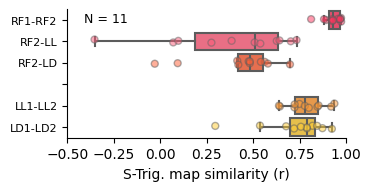

In [ ]:
rowSize,colSize= figurePanelDefaultSize()
ncols=2
nrows=1.0
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) # create a figure
mainSpec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(mainSpec[0]) 
outCross_lever = cross_stability_lever(ax,resLeverConcat,selectGridCellAND=True)

In [ ]:
report_stats(outCross_lever)

*****
Condition: atLever_dark_1-atLever_dark_2, Stats: 0.0, P_value: 0.0009765625
*****
Condition: atLever_light_1-atLever_light_2, Stats: 0.0, P_value: 0.0009765625
*****
Condition: circ80_1-circ80_2, Stats: 0.0, P_value: 0.0009765625
*****
Condition: circ80_2-atLever_dark, Stats: 1.0, P_value: 0.001953125
*****
Condition: circ80_2-atLever_light, Stats: 4.0, P_value: 0.0068359375


In [ ]:
myLabels={'circ80_1-circ80_2': "RF1-RF2", 
          'circ80_1-searchToLeverPath_light': "RF1-SL",
       'circ80_1-searchToLeverPath_dark': "RF1-SD",
       'circ80_1-homingFromLeavingLever_light': "RF1-HL",
       'circ80_1-homingFromLeavingLever_dark': "RF1-HD",
          
       'circ80_2-searchToLeverPath_light': "RF2-SL",
       'circ80_2-searchToLeverPath_dark': "RF2-SD",
       'circ80_2-homingFromLeavingLever_light': "RF2-HL",
       'circ80_2-homingFromLeavingLever_dark': "RF2-HD",
          
       'searchToLeverPath_light-searchToLeverPath_dark': "SL-SD",
       'homingFromLeavingLever_light-homingFromLeavingLever_dark':"HL-HD",
       'searchToLeverPath_light-homingFromLeavingLever_light': "SL-HL",
       'searchToLeverPath_dark-homingFromLeavingLever_dark': "SD-HD",
       'searchToLeverPath_light_1-searchToLeverPath_light_2': "SL1-SL2",
       'searchToLeverPath_dark_1-searchToLeverPath_dark_2': "SD1-SD2",
       'homingFromLeavingLever_light_1-homingFromLeavingLever_light_2': "HL1-HL2",
       'homingFromLeavingLever_dark_1-homingFromLeavingLever_dark_2': "HD1-HD2",
       'circ80_2-atLever_light': "RF2-LL",
       'circ80_2-atLever_dark': "RF2-LD",
       'searchToLeverPath_light-atLever_light': "SL-LL",
       'searchToLeverPath_dark-atLever_dark': "SD-LD",
       'homingFromLeavingLever_light-atLever_light': "HL-LL",
       'homingFromLeavingLever_dark-atLever_dark': "HD-LD",}

In [ ]:
minPairsPerMouse = 50
radius_tw = "10-0.5"
comp = 'searchToLeverPath_light-homingFromLeavingLever_light'
pairCounts = gcStcfm_pairs["10-0.5"]["circ80_1"].mouse.value_counts()
mouseSelection = list(pairCounts[pairCounts>minPairsPerMouse].index)
print(pairCounts)
print(mouseSelection)
meanCurveLever = np.empty((len(resLever.condition.unique()),len(mouseSelection),72))

for i, condition in enumerate(resLever.condition.unique()):
    for j, mouse in enumerate(mouseSelection):
        meanCurveLever[i,j]= np.nanmean(gcStcfmRot_lever[radius_tw][condition][(gcStcfm_pairs["10-0.5"]["circ80_1"].mouse==mouse)&
                                                                    (gcStcfm_pairs["10-0.5"]["circ80_1"].gridCell_AND_n1==True)&
                                                                    ((gcStcfm_pairs["10-0.5"]["circ80_1"].gridCell_AND_n2==True))],axis=0)

mouse
jp486     8781
jp3269    1094
jp452      810
mn8578     489
jp451      420
jp3120     386
jp3129     151
jp1686     145
jp1084     104
mn8599      82
jp1687      73
jp3130      33
jp1684      24
jp487       20
jp499       20
jp1685       4
jp497        2
Name: count, dtype: int64
['jp486', 'jp3269', 'jp452', 'mn8578', 'jp451', 'jp3120', 'jp3129', 'jp1686', 'jp1084', 'mn8599', 'jp1687']


In [ ]:
def plot_matrix_rotation_curves_lever(ax,meanCurve,res,showYLabel=True, condition ='circ80_1-circ80_2'):
    
    i = [ i for i, cond in enumerate(res.condition.unique()) if cond == condition][0]

    ax.imshow(meanCurveLever[i],aspect="auto",interpolation="None",origin="lower",
             extent=[-np.pi,np.pi,0,meanCurveLever[i].shape[0]])
    
    env1=condition.split("-")[0]
    env2=condition.split("-")[1]
    ax.set_title("{}".format(myLabels[condition]),fontsize=8)
    
    if showYLabel:
        ax.set_ylabel("Mouse")
    
    ax.set_xlabel("Rotation")
    
    ax.set_yticks(ticks=[])
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])   

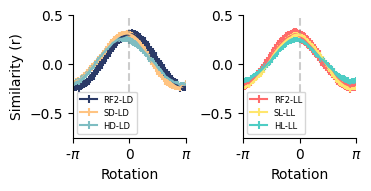

In [ ]:
def plot_cc_rotation_curves_rf_lever(ax,meanCurve,res,plotLegend=True, showYLabel=True, conditions =['circ80_1-circ80_2', 'circ80_2-searchToLeverPath_light',
       'circ80_2-searchToLeverPath_dark', 'circ80_2-homingFromLeavingLever_light','circ80_2-homingFromLeavingLever_dark'],colorPal = ['red','blue','yellow']):
    
    for color,condition in enumerate(conditions):
        i = [ i for i, cond in enumerate(res.condition.unique()) if cond == condition][0]
        ax.errorbar(x = np.linspace(-np.pi,np.pi,72) , y= meanCurve[i].mean(axis=0) ,  
                    yerr= meanCurve[i].std(axis=0)/np.sqrt(meanCurve[i].shape[0]),
                    label=myLabels[condition],color=colorPal[color])
    ax.plot([0,0],[-0.4,0.5],"--",color="gray",alpha=0.4)
    ax.set_xlabel("Rotation")
    if showYLabel:
        ax.set_ylabel("Similarity (r)")
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-0.75,0.5)
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if plotLegend:
        ax.legend(fontsize=6)

rowSize,colSize= figurePanelDefaultSize()
ncols=2
nrows=1
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) # create a figure
plotSpec = fig.add_gridspec(ncols=2, nrows=1)

ax = fig.add_subplot(plotSpec[0])
plot_cc_rotation_curves_rf_lever(ax,meanCurveLever,resLever,
                        conditions =['circ80_2-atLever_dark','searchToLeverPath_dark-atLever_dark','homingFromLeavingLever_dark-atLever_dark'],plotLegend=True,colorPal=['#2b3a67','#ffc482','#7ebdc2'])

ax = fig.add_subplot(plotSpec[1])
plot_cc_rotation_curves_rf_lever(ax,meanCurveLever,resLever,
                        conditions =['circ80_2-atLever_light','searchToLeverPath_light-atLever_light','homingFromLeavingLever_light-atLever_light'],
                        plotLegend=True, showYLabel=False,colorPal=['#ff6b6b','#ffe66d','#4ecdc4'])

In [ ]:
resLever.condition.unique()

array(['circ80_2-atLever_light', 'circ80_2-atLever_dark',
       'searchToLeverPath_light-atLever_light',
       'searchToLeverPath_dark-atLever_dark',
       'homingFromLeavingLever_light-atLever_light',
       'homingFromLeavingLever_dark-atLever_dark'], dtype=object)

/tmp/ipykernel_115548/914490040.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'RF1-RF2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.label[df.condition=='circ80_1-circ80_2'] = "RF1-RF2"
/tmp/ipykernel_115548/142567185.py:20: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=dfGridPair, y="label",x=vd,order = labelOrderCrossLever(),alpha=0.5,size=5,linewidth=1,palette=CROSSSTABILITYCOLOR)
/tmp/ipykernel_115548/142567185.py:20: UserWarning: The palette list has more values (15) than needed (6), which may not be intended.
  sns.stripplot(data=dfGridPair, y="label",x=vd,order = labelOrderCrossLever(),alpha=0.5,size=5,linewidth=1,palette=CROSSSTABILITYCOLOR)


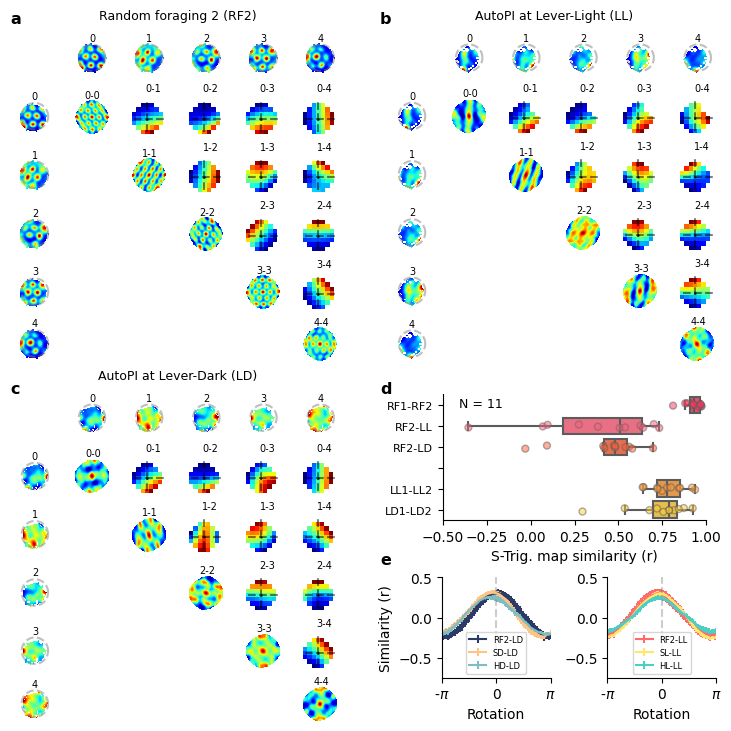

In [ ]:
rowSize,colSize= 0.6,0.6 
nCells=5
ncols=(nCells+1)*2
nrows=(nCells+1)*2
sessionName = "jp1686-26042022-0108" 

fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) # create a figure.
mainSpec = fig.add_gridspec(ncols=1, nrows=1) # create a GridSpec object to a figure
_gsStats = gridspec.GridSpecFromSubplotSpec(3,3,subplot_spec= mainSpec[0,0],height_ratios=[1,0.15,1],width_ratios=[0.95,0.1,1])
gsStats = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec= _gsStats[2,2],width_ratios=[0.05,1,1],height_ratios=[0.8,1])
gsStatsMatrix = gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec= gsStats[1,:])

plot_map_and_cross_for_figure_lever(mainSpec,sessionName,gcStcfm,gcStcfmLever,gcStcfmRot,gcStcfm_pairs,nCells)

ax = fig.add_subplot(gsStats[0,1:]) 
cross_stability_lever(ax,resLeverConcat,selectGridCellAND=True)

ax = fig.add_subplot(gsStatsMatrix[0])
plot_cc_rotation_curves_rf_lever(ax,meanCurveLever,resLever,
                        conditions =['circ80_2-atLever_dark','searchToLeverPath_dark-atLever_dark','homingFromLeavingLever_dark-atLever_dark'],plotLegend=True,colorPal=['#2b3a67','#ffc482','#7ebdc2'])

ax = fig.add_subplot(gsStatsMatrix[1])
plot_cc_rotation_curves_rf_lever(ax,meanCurveLever,resLever,
                        conditions =['circ80_2-atLever_light','searchToLeverPath_light-atLever_light','homingFromLeavingLever_light-atLever_light'],
                        plotLegend=True, showYLabel=False,colorPal=['#ff6b6b','#ffe66d','#4ecdc4'])


ax = fig.add_subplot(mainSpec[:,:]) # add an axes to the figure
ax.text(0,0.98, 'a', style='normal',fontsize=11.5, weight="bold")
ax.text(0.52,0.98, 'b', style='normal',fontsize=11.5, weight="bold")

ax.text(0,0.46, 'c', style='normal',fontsize=11.5, weight="bold")
ax.text(0.52,0.46, 'd', style='normal',fontsize=11.5, weight="bold")
ax.text(0.52,0.22, 'e', style='normal',fontsize=11.5, weight="bold")

ax.axis("off")


plt.savefig('../../Output/Sup_Figure3.pdf', bbox_inches='tight', dpi=300)